# Figure 5 - Upscaled CROP-seq KO150 screen

In [1]:
# set correct working directory -> project folder
getwd()
setwd('..')
getwd()

[1] "/home/sreichl/projects/bmdm-stim/src"

[1] "/home/sreichl/projects/bmdm-stim"

In [2]:
# source the figure theme, libraries and utility functions
source("./src/figure_theme.R")

In [3]:
library(Seurat, quietly=TRUE)
library(tidyr)

Attaching SeuratObject


Attaching package: ‘Seurat’


The following object is masked from ‘package:Hmisc’:

    Key



Attaching package: ‘tidyr’


The following object is masked from ‘package:reshape2’:

    smiths




# configs

In [4]:
# configs
data_path <- file.path('results','KO150')
results_path <- file.path('results','figures','figure_5')
cond <- "LO28-6h"

In [5]:
# make directories if not exist
dir.create(results_path, showWarnings = FALSE, recursive = TRUE)

# load & prepare data

In [6]:
# loading Seurat object
KO150 <-readRDS(file = file.path(data_path,paste0("KO150_normalized_Seurat.rds")))
KO150

An object of class Seurat 
48804 features across 28303 samples within 5 assays 
Active assay: SCT (17131 features, 3000 variable features)
 4 other assays present: RNA, AB, gRNA, HTO
 2 dimensional reductions calculated: pca, umap

In [7]:
# load mixscape object for LO28-6h
KO150_mixscape <- readRDS(file = file.path(data_path,'mixscape',cond,"KO150_mixscape_subset_Seurat.rds"))
KO150_mixscape

An object of class Seurat 
34184 features across 2822 samples within 5 assays 
Active assay: PRTB (2511 features, 0 variable features)
 4 other assays present: RNA, AB, gRNA, HTO
 6 dimensional reductions calculated: pca, umap, prtbpca, prtbumap, lda, ldaumap

In [8]:
# prepare metadata
KO150[['condition']] <- str_split_fixed(KO150$hto_demux, "_", 2)[,2]
KO150$KO_call[KO150$KO_call=='NonTargeting-'] <- 'NonTargeting'

KO150_mixscape[['condition']] <- str_split_fixed(KO150_mixscape$hto_demux, "_", 2)[,2]
KO150_mixscape$KO_call[KO150_mixscape$KO_call=='NonTargeting-'] <- 'NonTargeting'

In [9]:
unique(KO150$condition)
unique(KO150_mixscape$condition)

[1] "untreated" "LO28-6h"   "LO28-24h"

[1] "LO28-6h"

In [10]:
# # colors for cond
# cond_col <- setNames(object = hue_pal()(length(unique(KO150$condition))),nm = c('LO28-24h', 'LO28-6h', 'untreated'))
# cond_col

In [11]:
# loading KO15 Seurat object for KO calls
KO15 <-readRDS(file = file.path('results','KO15',paste0("KO15_normalized_Seurat.rds")))
KO15

An object of class Seurat 
45322 features across 9153 samples within 5 assays 
Active assay: SCT (14187 features, 3000 variable features)
 4 other assays present: RNA, AB, gRNA, HTO
 2 dimensional reductions calculated: pca, umap

In [12]:
# colors for all perturbations
# KO_col_KO15 <- setNames(object = hue_pal()(length(unique(KO15$KO_call))),nm = unique(KO15$KO_call))
# KO_col_KO15["mNon-targeting"] <- "#D3D3D3"
KO_col_KO15 <- KO_col
names(KO_col_KO15) <- sub('.', '', names(KO_col_KO15))
names(KO_col_KO15) <- sub('Non-targeting', 'NonTargeting', names(KO_col_KO15))
names(KO_col_KO15)[names(KO_col_KO15) == 'cJun'] <- 'Jun'
# KO_col_KO15

In [13]:
# extend colors to all KO150 perturbations
KO_col <- hue_pal()(length(unique(KO150$KO_call))+4)
KO_col <- KO_col[1:length(unique(KO150$KO_call))]
names(KO_col) <- unique(KO150$KO_call)
# KO_col

In [14]:
# change colors for consistency with KO15 
KO_col_names <- names(KO_col[names(KO_col) %in% names(KO_col_KO15)])

for (col in KO_col[KO_col %in% KO_col_KO15]){
    KO_col[KO_col==col] <- KO_col[names(KO_col_KO15[KO_col_KO15==col])]
}

KO_col[KO_col_names] <- KO_col_KO15[KO_col_names]

# Unsupervised Analysis (RNA)

In [87]:
width <- 4
height <- 4
options(repr.plot.width=width, repr.plot.height=height)

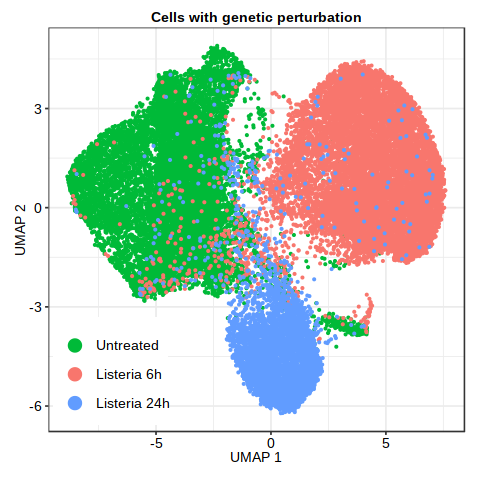

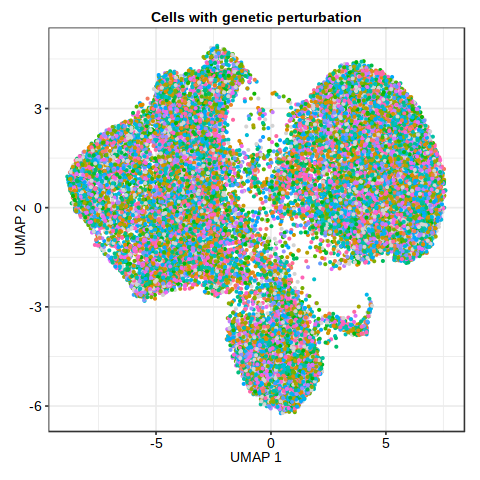

In [88]:
# ALL cells
for (group in c('condition', 'KO_call')){
    # plot umap
    umap_p <- DimPlot(KO150, reduction='umap', label = FALSE, group.by=group, pt.size=0.1) +
    { if (group=='KO_call') scale_color_manual(values=KO_col, drop=FALSE) } +
    { if (group=='condition') scale_color_manual(breaks=names(cond_colors), values=cond_colors, labels=treatment_format(names(cond_colors)), drop=FALSE)  } +
    xlab("UMAP 1") +    
    ylab("UMAP 2") +
    ggtitle("Cells with genetic perturbation") +
    macro_theme() +
    { if (group=='condition') theme(legend.position = c(0.15, 0.15), legend.box = "horizontal")  } +
    { if (group=='KO_call') NoLegend()}

    print(umap_p)

    # save plot
    ggsave_new(filename=paste0("UMAP_RNA_",group),
       results_path=results_path,
       plot=umap_p,
       width=width,
       height=height
      )
}

In [65]:
# load unsupervised analysis data of condition-wise mixscape
KO150_mixscape_all <- readRDS(file = file.path(data_path,"unsupervised_mixscape","KO150_normalized_Seurat.rds"))
KO150_mixscape_all

An object of class Seurat 
46518 features across 6187 samples within 5 assays 
Active assay: SCT (14845 features, 3000 variable features)
 4 other assays present: RNA, AB, gRNA, HTO
 2 dimensional reductions calculated: pca, umap

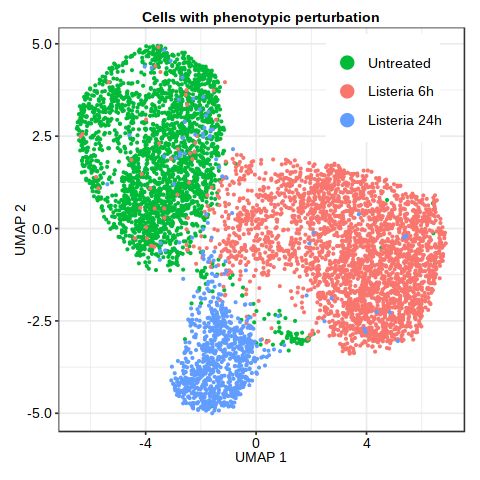

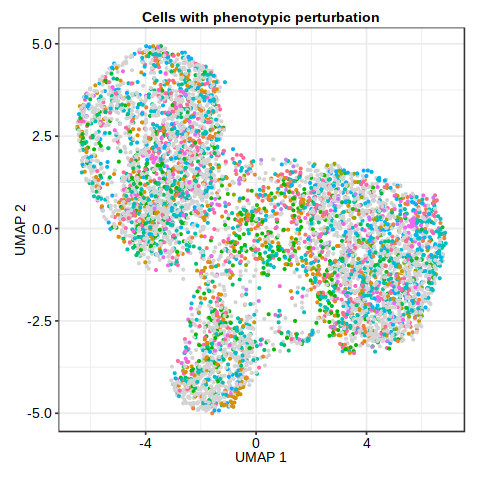

In [80]:
# mixscape selected cells
for (group in c('condition', 'KO_call')){
    # plot umap
    umap_p <- DimPlot(KO150_mixscape_all, reduction='umap', label = FALSE, group.by=group, pt.size=0.1) +
    { if (group=='KO_call') scale_color_manual(values=KO_col, drop=FALSE) } +
    { if (group=='condition') scale_color_manual(breaks=names(cond_colors), values=cond_colors, labels=treatment_format(names(cond_colors)), drop=FALSE)  } +
    xlab("UMAP 1") +    
    ylab("UMAP 2") +
    ggtitle("Cells with phenotypic perturbation") +
    macro_theme() +
    { if (group=='condition') theme(legend.position = c(0.8, 0.85), legend.box = "horizontal")  } +
    { if (group=='KO_call') NoLegend()}

    print(umap_p)

    # save plot
    ggsave_new(filename=paste0("UMAP_RNA_mixscape_",group),
       results_path=results_path,
       plot=umap_p,
       width=width,
       height=height
      )
}

# DEA statistics

In [81]:
# Load mixscape class information & filter annotations
annot_mixscape <- read.csv(file=file.path(data_path,'mixscape',cond, "KO150_mixscape_annotations.csv"), row.names=1)
annot_mixscape <- annot_mixscape[annot_mixscape$mixscape_class.global=='KO',]
annot_mixscape$mixscape_class <- gsub(' KO','', annot_mixscape$mixscape_class)
dim(annot_mixscape)
head(annot_mixscape)

[1] 1599    3

,mixscape_class,mixscape_class_p_ko,mixscape_class.global
,<chr>,<dbl>,<chr>
B1_AAACCTGAGGTAGCCA-1,Irf9,0.9981498,KO
B1_AAACCTGTCATGCAAC-1,Irf9,0.9890821,KO
B1_AAACGGGGTGGGTCAA-1,Irf9,0.9912651,KO
B1_AAAGATGAGTATCGAA-1,Smarca4,0.9999999,KO
B1_AAAGCAAAGGTGATAT-1,Ep300,0.9630801,KO
B1_AAAGTAGTCTCGCTTG-1,Spi1,1.0000000,KO


In [82]:
cond <- "LO28-6h"
mixscape_KOs <- unique(annot_mixscape$mixscape_class)

dea_plots <- list()

for (mixscape in c("","_mixscape")){
    for (mode in c("RNA","AB")){
        tmp_name <- paste0(mode,mixscape)
        # load dea statistics
        dea_stats <- read.csv(file.path(data_path, paste0("DEA_condition",mixscape),paste0("KO150_DEA_",mode,"_summary_",cond,".csv")), row.names=1)
        # remove NonTargeting
        dea_stats <- dea_stats[rownames(dea_stats)!="NonTargeting",]
        # dim(dea_stats)
        # head(dea_stats)
        
        dea_stats$color <- lapply(rownames(dea_stats),FUN = function(x) if(x %in% mixscape_KOs) KO_col[x] else KO_col['NonTargeting']) #KO_col[rownames(dea_stats)]
        dea_stats$label <- lapply(rownames(dea_stats),FUN = function(x) if(x %in% mixscape_KOs) x else "") #rownames(dea_stats)
        
        dea_plots[[tmp_name]] <- ggplot(data = dea_stats, aes(x=down, y=up, label = label, color=color)) +
        geom_point(size=1, alpha=0.5, shape=19, stroke=0) + 
        geom_text_repel(size=2.5, segment.size=0.2) +
        ggtitle(tmp_name) +
        xlab(paste0("# down regulated ",mode)) +    
        ylab(paste0("# up regulated ",mode)) +
        macro_theme()+
        theme(legend.position="none")#, axis.title=element_blank())
    }
}

In [96]:
width <- 2
height <- 4
options(repr.plot.width=width, repr.plot.height=height)

Warning message:
“Removed 3 rows containing missing values (geom_point).”
Warning message:
“Removed 3 rows containing missing values (geom_text_repel).”
Warning message:
“ggrepel: 7 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“Removed 3 rows containing missing values (geom_point).”
Warning message:
“Removed 3 rows containing missing values (geom_text_repel).”
Warning message:
“ggrepel: 16 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 11 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“Removed 3 rows containing missing values (geom_point).”
Warning message:
“Removed 3 rows containing missing values (geom_text_repel).”
Warning message:
“ggrepel: 16 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 11 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning

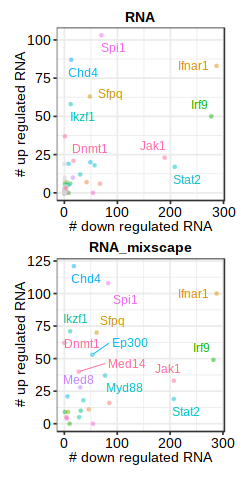

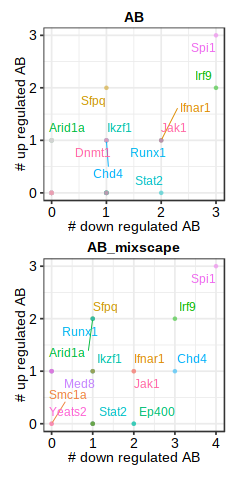

In [98]:
for(assay in c('RNA','AB')){
    dea_plots_panel <- wrap_plots(dea_plots[grepl(assay, names(dea_plots))], ncol = 1)
    
    print(dea_plots_panel)
    
    # save plot
    ggsave_new(filename=paste0(paste0("DEA_stats_",cond,"_",assay)),
           results_path=results_path,
           plot=dea_plots_panel,
           width=width,
           height=height
          )
}

# Mixscape LDA UMAP plot for 6h

In [15]:
KO_col_mixscape <- KO_col
# names(KO_col_mixscape) <- paste(names(KO_col_mixscape), 'KO')
names(KO_col_mixscape) <- sub('NonTargeting', 'NT', names(KO_col_mixscape))
# KO_col_mixscape

In [16]:
# load data
cond <- "LO28-6h"
sub <- readRDS(file = file.path(data_path,'mixscape',cond,paste0("KO150_mixscape_subset_Seurat.rds")))
sub$mixscape_class_new <- as.factor(sub(' KO', '', sub$mixscape_class))
Idents(sub) <- "mixscape_class_new"

In [45]:
KO150_mixscape_plot <- DimPlot(object = sub,
                                        reduction = "ldaumap",
                                        repel = T,
                                        label.size = 5, # 4
                                        label = T,
                                        cols = KO_col_mixscape,#col,
                                        pt.size=0.25,
                                        label.box=T) +
scale_color_manual(values=KO_col_mixscape, drop=FALSE) +
ylab("UMAP 2") +
xlab("UMAP 1") +
macro_theme()+
ggtitle(treatment_format(cond)) +
theme(plot.title = element_text(hjust=0.5))+
NoLegend()

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



In [46]:
width <- 5
height <- 5
options(repr.plot.width=width, repr.plot.height=height)

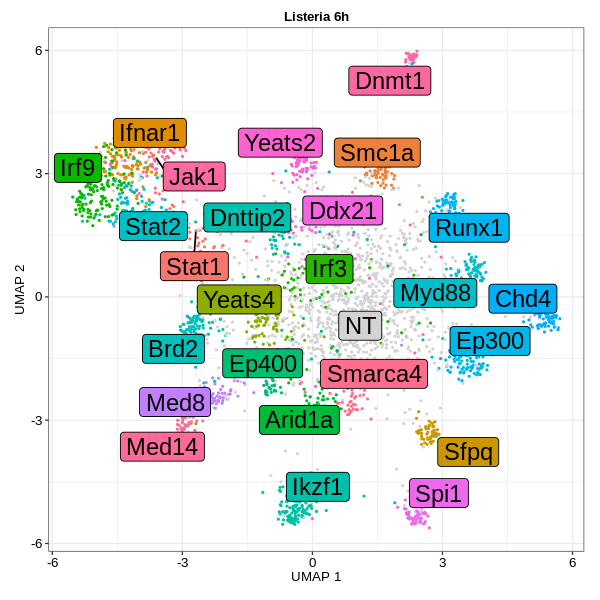

In [47]:
KO150_mixscape_plot

In [48]:
# save plot
ggsave_new(filename=paste0("mixscape_LDA_UMAP_",cond),
           results_path=results_path,
           plot=KO150_mixscape_plot,
           width=width,
           height=height
          )

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warnin

# Cross prediction graph for 6h

In [49]:
# configs
cond <- 'LO28-6h'
clf_label <- 'LR'
conn_label <- 'prob'
directed <- TRUE

In [50]:
# Load adjacency matrix
conn <- read.csv(file=file.path(data_path,'KO_classifier', cond, paste0("KO150_clf",clf_label,"_conn",conn_label,"Norm.csv")), row.names=1)
colnames(conn)<-gsub('.KO','',colnames(conn))
rownames(conn)<-gsub(' KO','',rownames(conn))
dim(conn)
# conn

[1] 25 25

In [51]:
# Load mixscape class information & filter annotations
annot_mixscape <- read.csv(file=file.path(data_path,'mixscape',cond, "KO150_mixscape_annotations.csv"), row.names=1)
annot_mixscape <- annot_mixscape[annot_mixscape$mixscape_class.global=='KO',]
annot_mixscape$mixscape_class <- gsub(' KO','', annot_mixscape$mixscape_class)
dim(annot_mixscape)
head(annot_mixscape)

[1] 1599    3

,mixscape_class,mixscape_class_p_ko,mixscape_class.global
,<chr>,<dbl>,<chr>
B1_AAACCTGAGGTAGCCA-1,Irf9,0.9981498,KO
B1_AAACCTGTCATGCAAC-1,Irf9,0.9890821,KO
B1_AAACGGGGTGGGTCAA-1,Irf9,0.9912651,KO
B1_AAAGATGAGTATCGAA-1,Smarca4,0.9999999,KO
B1_AAAGCAAAGGTGATAT-1,Ep300,0.9630801,KO
B1_AAAGTAGTCTCGCTTG-1,Spi1,1.0000000,KO


In [52]:
# calculate class sizes to indicate as symbol size
class_sizes <- as.numeric((table(annot_mixscape$mixscape_class)[colnames(conn)]))

In [53]:
# load previous best layout coordinates
coordinates <- as.matrix(read.csv(file.path("results/KO150/KO_classifier",cond,'layoutCoordinates.csv'), row.names=1))
dim(coordinates)
head(coordinates)

[1] 25  2

,x,y
1,0.8792144,-2.976067
2,-15.0005760,5.419335
3,-14.0198076,-6.896990
4,-3.8606981,9.150743
5,-16.3056026,-3.811825
6,-7.0629334,9.386586


In [119]:
# make cross prediction graph plot

# set colors & shapes
node_KO <- rownames(conn)
node_cond <- rep(cond, times = dim(conn)[1])
node_colors <- KO_col[node_KO]
node_shape <- cond_shapes[node_cond]
border_color <- cond_colors[node_cond]
stroke_size <- 1.5
point_size <- 5

cut_off <- 0.1

# data
adjacencyMatrix <- as.matrix(conn)
# parameters
curved=FALSE

adjacencyMatrix[adjacencyMatrix<cut_off] <- 0

# plot graph

# Empty ggplot2 theme
new_theme_empty <- theme_bw() 
new_theme_empty$line <- element_blank()
new_theme_empty$rect <- element_blank()
new_theme_empty$strip.text <- element_blank()
new_theme_empty$axis.text <- element_blank()
new_theme_empty$plot.title <- element_blank()
new_theme_empty$axis.title <- element_blank()
new_theme_empty$plot.margin <- structure(c(0, 0, 0, 0), unit = "lines",
                                         valid.unit = 3L, class = "unit")

if (exists("coordinates")){
    layoutCoordinates <- coordinates
} else{
    layoutCoordinates <- gplot(adjacencyMatrix, mode = "fruchtermanreingold")  # Get graph layout coordinates
}


adjacencyList <- melt(adjacencyMatrix)  # Convert to list of ties only
adjacencyList <- adjacencyList[adjacencyList$value > cut_off, ] # prune weak edges

# Function to generate paths between each connected node
edgeMaker <- function(whichRow, len = 100, curved = TRUE){
    fromC <- layoutCoordinates[adjacencyList[whichRow, 1], ]  # Origin
    toC <- layoutCoordinates[adjacencyList[whichRow, 2], ]  # Terminus

    # Add curve:
    graphCenter <- colMeans(layoutCoordinates)  # Center of the overall graph
    bezierMid <- c(fromC[1], toC[2])  # A midpoint, for bended edges
    distance1 <- sum((graphCenter - bezierMid)^2)
    if(distance1 < sum((graphCenter - c(toC[1], fromC[2]))^2)){
    bezierMid <- c(toC[1], fromC[2])
    }  # To select the best Bezier midpoint
    bezierMid <- (fromC + toC + bezierMid) / 3  # Moderate the Bezier midpoint
    if(curved == FALSE){bezierMid <- (fromC + toC) / 2}  # Remove the curve

    edge <- data.frame(bezier(c(fromC[1], bezierMid[1], toC[1]),  # Generate
                            c(fromC[2], bezierMid[2], toC[2]),  # X & y
                            evaluation = len))  # Bezier path coordinates
    edge$Sequence <- 1:len  # For size and colour weighting in plot
    edge$Group <- paste(adjacencyList[whichRow, 1:2], collapse = ">")

    # add a vector 'Probability' that linearly interpolates between the weights of the current edge and its counterpart
    x <- c(1,len)
    y <- c(adjacencyMatrix[adjacencyList[whichRow,'Var1'],adjacencyList[whichRow,'Var2']],adjacencyMatrix[adjacencyList[whichRow,'Var2'],adjacencyList[whichRow,'Var1']])
    edge$Probability <- approx(x,y,xout=1:len)$y

  return(edge)
}

# Generate a (curved) edge path for each pair of connected nodes
allEdges <- lapply(1:nrow(adjacencyList), edgeMaker, len = 500, curved = curved)
allEdges <- do.call(rbind, allEdges)  # a fine-grained path ^, with bend ^

zp1 <- ggplot(allEdges) 
zp1 <- zp1 + geom_path(aes(x = x, y = y, group = Group,  # Edges with gradient
                           colour = Sequence, size = Probability))  # and taper

zp1 <- zp1 + geom_point(data = data.frame(layoutCoordinates),  # Add nodes
#                         aes(x = x, y = y),  pch = 21, size = point_size, fill = node_colors, colour = border_color, stroke = stroke_size) # fill & borders are informative
                        aes(x = x, y = y), shape=node_shape, size = sqrt(class_sizes), color = node_colors)#+scale_shape_manual(name = "condition", labels = names(cond_shapes),values = cond_shapes) # fill and shape are informative

# zp1 <- zp1 + geom_text(data = data.frame(layoutCoordinates), aes(x = x, y = y, label=node_KO),#rownames(adjacencyMatrix)),
#                        hjust=0.5, vjust=-1)

zp1 <- zp1 + geom_label(data = data.frame(layoutCoordinates), aes(x = x, y = y, label=node_KO), fill=node_colors,#rownames(adjacencyMatrix)),
                        hjust=0.5, vjust=-0.5)

zp1 <- zp1 + scale_colour_gradient(low = gray(0), high = gray(0), guide = "none") # Customize gradient

zp1 <- zp1 + scale_size(range = c(1/10, point_size-1))#, guide = "none")  # Customize taper

crosspred_p <- zp1 + new_theme_empty + theme(legend.position = c(0.5, 0.5))+ guides(size = guide_legend(title='Average\ncross-prediction\nprobability')) # Clean up plot

Warning message in melt(adjacencyMatrix):
“The melt generic in data.table has been passed a matrix and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(adjacencyMatrix). In the next version, this warning will become an error.”


In [62]:
width <- 7 
height <- 7
options(repr.plot.width=width, repr.plot.height=height)

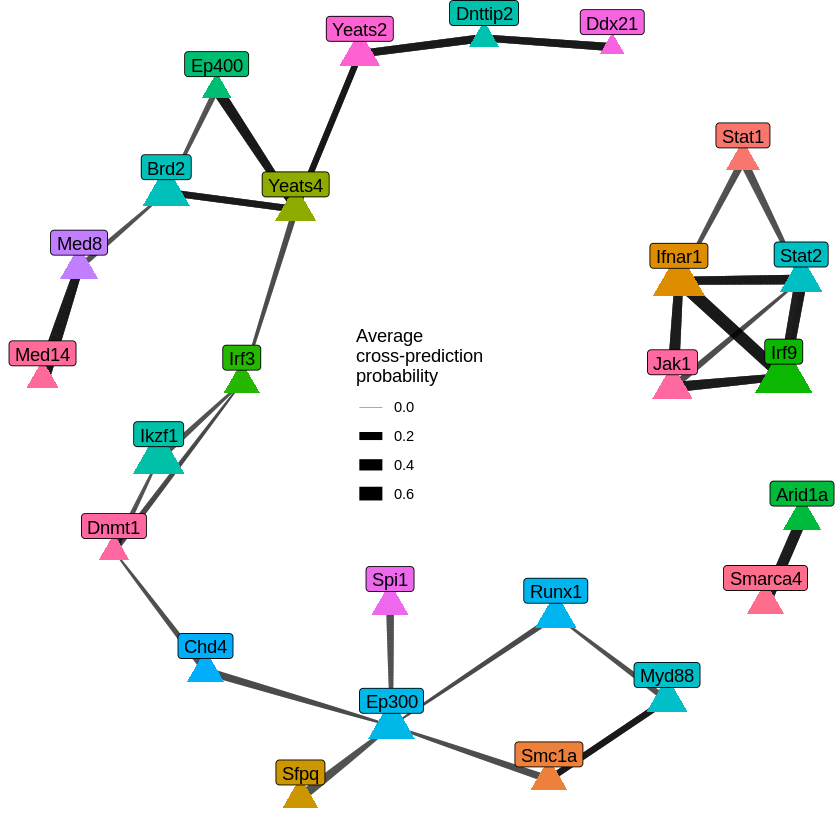

In [120]:
crosspred_p

In [57]:
# save plot
ggsave_new(filename=paste0("crossprediction_graph_",cond),
           results_path=results_path,
           plot=crosspred_p,
           width=width,
           height=height
          )

In [65]:
# # save layout coordinates
# write.csv(layoutCoordinates, file.path("results/KO150/KO_classifier",cond,'layoutCoordinates.csv'))

# String DB violin plots for 6h

In [121]:
# load data
union_df <- read.csv(file=file.path(data_path,'KO_classifier', cond,paste0("KO150_clf",clf_label,"_graph",conn_label,"_STRING_comparison.csv")), row.names=1)
dim(union_df)
head(union_df)

[1] 164   5

,string,crosspredict,overlap,unique_crosspredict,unique_string
,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>
Yeats2-Yeats4,0.781,0.1110521,TRUE,FALSE,FALSE
Stat1-Stat2,0.995,0.1105376,TRUE,FALSE,FALSE
Spi1-Stat2,0.376,0.0000000,FALSE,FALSE,TRUE
Spi1-Stat1,0.678,0.0000000,FALSE,FALSE,TRUE
Smc1a-Yeats4,0.216,0.0000000,FALSE,FALSE,TRUE
Smarca4-Yeats4,0.626,0.0000000,FALSE,FALSE,TRUE


In [122]:
#Perform the Mann-Whitney U test
wt_re <- wilcox.test(x=union_df[(union_df$string>0) & (union_df$overlap),'string'], y=union_df[(union_df$string>0) & (!union_df$overlap),'string'])

In [140]:
width <- 5
height <- 5
options(repr.plot.width=width, repr.plot.height=height)

In [124]:
# make points nicer

In [129]:
options(ggrepel.max.overlaps = 21)

In [130]:
top_labels <- rownames(union_df[union_df$overlap==TRUE,])[order(union_df[union_df$overlap==TRUE,]$string, decreasing = TRUE)]#[1:11]
top_labels <- paste(top_labels, collapse='\n')

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



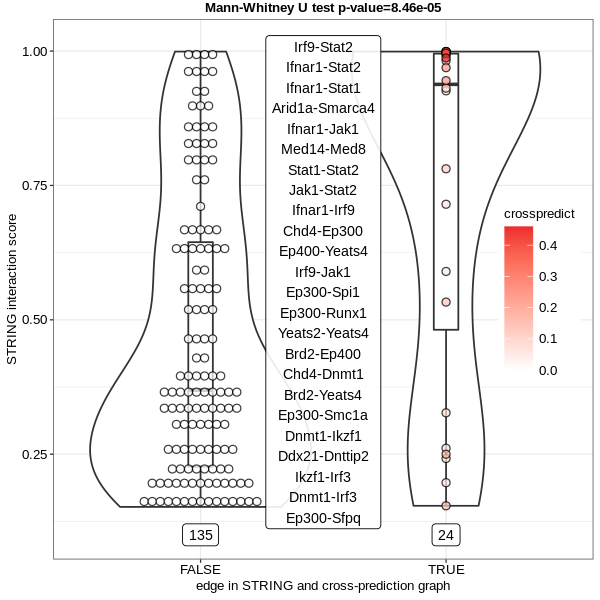

In [141]:
n_t <- sum(union_df$overlap)
n_f <- sum(union_df$unique_string)

violin_plot <- ggplot(union_df[union_df$string>0,], aes(x=overlap, y=string)) + 
geom_violin(trim=TRUE)+
geom_boxplot(width=0.1) +
# geom_segment(aes(x=1.7, xend=TRUE, y=0.75, yend=1), size=0.2) + # make line connecting the top labels box with the top dots
geom_dotplot(aes(group=crosspredict, fill=crosspredict), binaxis='y', stackdir='center', dotsize=0.5, alpha=0.75)+
scale_fill_gradient2(midpoint=0, low="royalblue4", mid="white", high="firebrick2", space ="Lab") +
annotate(x=FALSE, y = 0.1, label=paste0(n_f), geom="label", hjust=0.5, size=3, color = 'black')+
annotate(x=TRUE, y = 0.1, label=paste0(n_t), geom="label", hjust=0.5, size=3, color = 'black')+
ggtitle(paste0('Mann-Whitney U test p-value=',formatC(wt_re$p.value, format = "e", digits = 2))) +
xlab("edge in STRING and cross-prediction graph") +    
ylab("STRING interaction score") +
# geom_label_repel(data = union_df[union_df$overlap==TRUE,], # label all overlapping edges/dots
#                      aes(x = overlap, y = string, label=rownames(union_df[union_df$overlap==TRUE,])), 
#                      size = 2.5,
#                     min.segment.length = 0,
#                     segment.size = 0.2, # line thickness
# #                      xlim=if(grepl('untreated',axis[1])) c(NA,NA) else c(-4,12),
#                  ylim = c(NA, Inf),
#                      fill = alpha(c("white"),0.75),
#                      seed = 42
#                     ) +
annotate(x=1.5, y = 0.57, label=top_labels, geom="label", hjust=0.5, size=3, color = 'black', fill = alpha(c("white"),0.9))+ # annotate not shown labels at the top
macro_theme() +
theme(legend.position = c(0.9, 0.5))

violin_plot

In [142]:
# save plot
ggsave_new(filename=paste0("crossprediction_STRING_scores_",cond),
           results_path=results_path,
           plot=violin_plot,
           width=width,
           height=height
          )

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$

ERROR: Error in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, : invalid font type


# non-trivial and non-STRING edges - visualize LFC of DEGs

In [71]:
# configs
cond <- "LO28-6h"
top_n <- 3
non_trivial_kos <- c("Yeats2", "Yeats4", "Ep300", "Smc1a") #c("Ikzf1", "Irf3", "Dnmt1", "Yeats2", "Yeats4", "Ep300", "Smc1a", "Chd4")

In [72]:
# load STRING comparison
string_comp <- read.csv(file.path(data_path,"KO_classifier", cond, "KO150_clfLR_graphprob_STRING_comparison.csv"), row.names=1)
dim(string_comp)
head(string_comp)

kos <- unique(unlist(strsplit(rownames(string_comp)[string_comp$unique_crosspredict],'-',fixed=T)))
kos

[1] 164   5

,string,crosspredict,overlap,unique_crosspredict,unique_string
,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>
Yeats2-Yeats4,0.781,0.1110521,TRUE,FALSE,FALSE
Stat1-Stat2,0.995,0.1105376,TRUE,FALSE,FALSE
Spi1-Stat2,0.376,0.0000000,FALSE,FALSE,TRUE
Spi1-Stat1,0.678,0.0000000,FALSE,FALSE,TRUE
Smc1a-Yeats4,0.216,0.0000000,FALSE,FALSE,TRUE
Smarca4-Yeats4,0.626,0.0000000,FALSE,FALSE,TRUE


[1] "Myd88"   "Smc1a"   "Runx1"   "Irf3"    "Yeats4"  "Dnttip2" "Yeats2" 
[8] "Brd2"    "Med8"

In [73]:
# add non-trivial edge KOs to list
kos <- unique(c(kos, non_trivial_kos))
length(kos)
kos

[1] 10

[1] "Myd88"   "Smc1a"   "Runx1"   "Irf3"    "Yeats4"  "Dnttip2" "Yeats2" 
 [8] "Brd2"    "Med8"    "Ep300"

In [74]:
# manual ordering
kos <- c('Dnttip2','Yeats2','Yeats4','Irf3','Brd2','Med8','Ep300','Smc1a','Myd88','Runx1')

In [75]:
# load LFC data
dea_lfc <- read.csv(file.path(data_path,"DEA_condition_mixscape", paste0("KO150_DEA_RNA_LFC_",cond,".csv")), row.names=1)
dim(dea_lfc)
head(dea_lfc)

[1] 1234   25

,Irf9,Smarca4,Ep300,Spi1,Arid1a,Dnmt1,Yeats4,Ep400,Ikzf1,Myd88,⋯,Jak1,Med8,Dnttip2,Ifnar1,Yeats2,Stat2,Chd4,Irf3,Sfpq,Ddx21
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Odc1,NA,0.2887520,-0.4958778,-0.2283975,NA,-0.3712599,0.1986112,0.5039370,0.3772990,-1.1895815,⋯,NA,-0.3946272,-0.3005607,0.1920594,0.1505843,0.1867928,-0.4009229,NA,-0.2625928,-0.2616354
Ccl9,NA,-0.2380281,-0.5894391,-1.6149950,-0.1842208,-0.5882895,0.4532972,0.2709273,NA,-1.1006211,⋯,-0.1960539,-0.4166192,0.1185633,NA,0.1834645,-0.1686917,-0.2804580,NA,NA,-0.4331398
S100a6,NA,0.4139550,-0.3712556,0.4479609,0.7350364,NA,NA,NA,-0.1104408,0.3575406,⋯,NA,-0.3369532,-0.4239343,NA,NA,0.3638403,-1.1398221,0.3035934,NA,NA
Lpl,0.3028517,0.2916825,NA,-1.6441126,0.2625617,0.7347005,0.3738093,-0.1997933,0.2336662,0.2592160,⋯,0.2639180,-0.1849811,-0.4179488,0.1798059,0.2910117,0.1621218,0.4059726,-0.1072845,-1.2492883,-0.2630399
Fth1,NA,0.3887168,-0.8223708,NA,0.3104685,NA,0.3139108,1.3099304,-0.5175071,NA,⋯,0.2756553,-0.6158101,NA,NA,-0.1844657,NA,-0.9741889,0.3039477,0.1355233,NA
Marcksl1,-0.1866439,NA,0.6303777,-0.4637864,0.3143291,-0.2895969,-0.3586242,-0.1072860,0.2759468,-1.3845022,⋯,-0.4713774,NA,0.3113847,-0.1693559,0.2037935,-0.4299136,NA,-0.5851258,0.9180526,0.3488668


In [76]:
# get top_n genes
top_genes <- c()
top_labels <- c()

for (ko in kos){
    tmp_dea <- read.csv(file.path(data_path,"DEA_condition_mixscape", paste0("KO150_DEA_RNA_",cond,"_",ko,".csv")), row.names=1)
    # dim(tmp_dea)
    # head(tmp_dea)

    top_genes <- unique(c(top_genes, rownames(tmp_dea)[tmp_dea$p_val_adj<0.05]))
    top_labels <- unique(c(top_labels, rownames(tmp_dea)[order(tmp_dea$p_val_adj)][1:top_n]))
}

In [77]:
length(top_genes)
length(top_labels)

[1] 425

[1] 28

In [78]:
dea_lfc_top <- dea_lfc[top_genes,kos]
dea_lfc_top[is.na(dea_lfc_top)] <- 0
# dea_lfc_top <- t(dea_lfc_top)

dim(dea_lfc_top)
head(dea_lfc_top)

[1] 425  10

,Dnttip2,Yeats2,Yeats4,Irf3,Brd2,Med8,Ep300,Smc1a,Myd88,Runx1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Rps9,-0.7600601,-0.2410155,-0.1394273,0.0000000,0.1454641,0.0000000,0.0000000,0.0000000,0.1058651,0
Rpl3,-0.8434916,-0.3095746,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0
Rpl9,-0.6793101,-0.7235364,0.0000000,0.0000000,0.1027654,0.0000000,0.0000000,0.1092277,0.0000000,0
Rpl10a,-0.7242649,-0.6714818,0.0000000,-0.1016443,0.1821406,0.0000000,0.0000000,0.1583396,0.0000000,0
H2-Q4,0.8484300,0.2816148,-0.1805566,0.1748305,0.0000000,0.0000000,0.6407127,0.3784764,0.0000000,0
Rps3a1,-0.5372635,-0.6547694,0.0000000,0.0000000,0.0000000,0.1732717,0.0000000,0.1540395,0.1480003,0


In [79]:
# save LFCs
write.csv(dea_lfc_top, file.path(results_path,"DEA_LFC_nonTrivial_nonSTRING_KOs.csv"))

In [80]:
annot_ko <- data.frame(KO=rep("", length(kos)))
rownames(annot_ko) <- kos
annot_ko$KO <- kos

dim(annot_ko)
head(annot_ko)

[1] 10  1

,KO
,<chr>
Dnttip2,Dnttip2
Yeats2,Yeats2
Yeats4,Yeats4
Irf3,Irf3
Brd2,Brd2
Med8,Med8


In [81]:
# wrapper from here: https://stackoverflow.com/questions/52599180/partial-row-labels-heatmap-r

# heat refers to the original heatmap produced from the pheatmap() function
# kept.labels should be a vector of labels you wish to show
# repel.degree is a number in the range [0, 1], controlling how much the
# labels are spread out from one another

add.flag <- function(pheatmap,
                     kept.labels,
                     repel.degree) {

  # repel.degree = number within [0, 1], which controls how much 
  #                space to allocate for repelling labels.
  ## repel.degree = 0: spread out labels over existing range of kept labels
  ## repel.degree = 1: spread out labels over the full y-axis

  heatmap <- pheatmap$gtable

  new.label <- heatmap$grobs[[which(heatmap$layout$name == "row_names")]] 

  # keep only labels in kept.labels, replace the rest with ""
  new.label$label <- ifelse(new.label$label %in% kept.labels, 
                            new.label$label, "")

  # calculate evenly spaced out y-axis positions
  repelled.y <- function(d, d.select, k = repel.degree){
    # d = vector of distances for labels
    # d.select = vector of T/F for which labels are significant

    # recursive function to get current label positions
    # (note the unit is "npc" for all components of each distance)
    strip.npc <- function(dd){
      if(!"unit.arithmetic" %in% class(dd)) {
        return(as.numeric(dd))
      }

      d1 <- strip.npc(dd$arg1)
      d2 <- strip.npc(dd$arg2)
      fn <- dd$fname
      return(lazyeval::lazy_eval(paste(d1, fn, d2)))
    }

    full.range <- sapply(seq_along(d), function(i) strip.npc(d[i]))
    selected.range <- sapply(seq_along(d[d.select]), function(i) strip.npc(d[d.select][i]))

    return(unit(seq(from = max(selected.range) + k*(max(full.range) - max(selected.range)),
                    to = min(selected.range) - k*(min(selected.range) - min(full.range)), 
                    length.out = sum(d.select)), 
                "npc"))
  }
  new.y.positions <- repelled.y(new.label$y,
                                d.select = new.label$label != "")
  new.flag <- segmentsGrob(x0 = new.label$x,
                           x1 = new.label$x + unit(0.15, "npc"),
                           y0 = new.label$y[new.label$label != ""],
                           y1 = new.y.positions)

  # shift position for selected labels
  new.label$x <- new.label$x + unit(0.2, "npc")
  new.label$y[new.label$label != ""] <- new.y.positions

  # add flag to heatmap
  heatmap <- gtable::gtable_add_grob(x = heatmap,
                                   grobs = new.flag,
                                   t = 4, 
                                   l = 4
  )

  # replace label positions in heatmap
  heatmap$grobs[[which(heatmap$layout$name == "row_names")]] <- new.label

  # plot result
  grid.newpage()
  grid.draw(heatmap)

  # return a copy of the heatmap invisibly
  invisible(heatmap)
}


In [82]:
width <- 4
height <- 4
options(repr.plot.width=width, repr.plot.height=height)

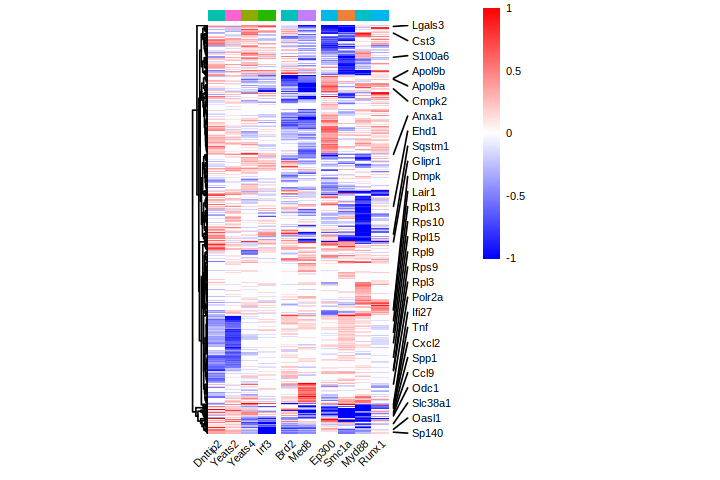

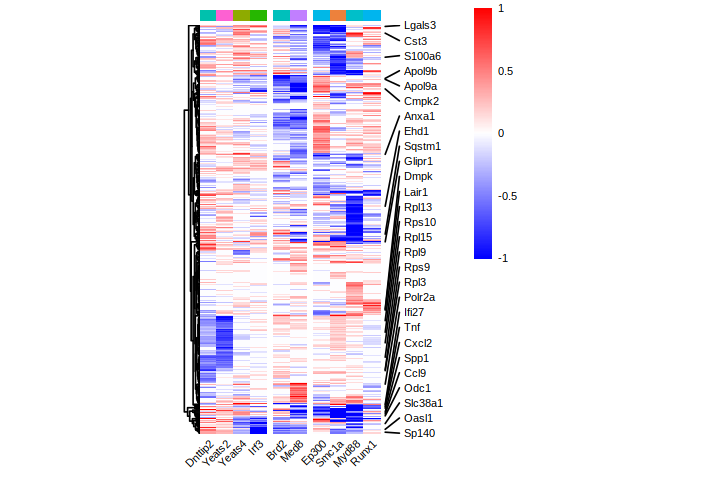

In [87]:
dea_string_p <- as.ggplot(add.flag(pheatmap(dea_lfc_top,
#                                 display_numbers = ,
                                breaks=seq(-1, 1, length.out=200),
                                color=colorRampPalette(c("blue", "white", "red"))(200),
                                angle_col = 45,
                                show_rownames=T,
                                show_colnames=T, 
                                annotation_col = annot_ko,
                                annotation_colors = list(KO=KO_col[kos]),
                                            annotation_legend = FALSE,
                                            annotation_names_col = FALSE,
#                                 cutree_rows = 3, # split row clusters
#                                 cutree_cols = 4, # split col clusters
                                treeheight_row = 5,
                                treeheight_col = 5,
                                            cluster_cols = F,
                                            gaps_col = c(4,6),
                                cellwidth = 10,
#                                 cellheight = 10,
                                fontsize = 6,
                                height=height,
                                widht=width,
                                silent=TRUE
                                           ),
                                   kept.labels = top_labels,
                                   repel.degree = 1
                                  )
                         )
dea_string_p

## 90 degree turned version

In [364]:
# wrapper adapted from here: https://stackoverflow.com/questions/52599180/partial-row-labels-heatmap-r

# heat refers to the original heatmap produced from the pheatmap() function
# kept.labels should be a vector of labels you wish to show
# repel.degree is a number in the range [0, 1], controlling how much the
# labels are spread out from one another

add.flag <- function(pheatmap,
                     kept.labels,
                     repel.degree) {

  # repel.degree = number within [0, 1], which controls how much 
  #                space to allocate for repelling labels.
  ## repel.degree = 0: spread out labels over existing range of kept labels
  ## repel.degree = 1: spread out labels over the full y-axis

  heatmap <- pheatmap$gtable

  new.label <- heatmap$grobs[[which(heatmap$layout$name == "col_names")]] 

  # keep only labels in kept.labels, replace the rest with ""
  new.label$label <- ifelse(new.label$label %in% kept.labels, 
                            new.label$label, "")

  # calculate evenly spaced out x-axis positions
  repelled.x <- function(d, d.select, k = repel.degree){
    # d = vector of distances for labels
    # d.select = vector of T/F for which labels are significant

    # recursive function to get current label positions
    # (note the unit is "npc" for all components of each distance)
    strip.npc <- function(dd){
      if(!"unit.arithmetic" %in% class(dd)) {
        return(as.numeric(dd))
      }

      d1 <- strip.npc(dd$arg1)
      d2 <- strip.npc(dd$arg2)
      fn <- dd$fname
      return(lazyeval::lazy_eval(paste(d1, fn, d2)))
    }

    full.range <- sapply(seq_along(d), function(i) strip.npc(d[i]))
    selected.range <- sapply(seq_along(d[d.select]), function(i) strip.npc(d[d.select][i]))

#     return(unit(seq(from = max(selected.range) + k*(max(full.range) - max(selected.range)),
#                     to = min(selected.range) - k*(min(selected.range) - min(full.range)), 
#                     length.out = sum(d.select)), 
#                 "npc"))
     return(unit(seq(from = min(selected.range) - k*(min(selected.range) - min(full.range)),
                to = max(selected.range) + k*(max(full.range) - max(selected.range)), 
                length.out = sum(d.select)), 
            "npc"))
  }
  new.x.positions <- repelled.x(new.label$x,
                                d.select = new.label$label != "")
                             
  new.flag <- segmentsGrob(y0 = new.label$y + unit(0.05, "npc"), # moves closer to heatmap
                           y1 = new.label$y - unit(0.18, "npc"), # moves closer to label
                           x0 = new.label$x[new.label$label != ""],
                           x1 = new.x.positions,
                         gp = gpar(lwd = 0.5))  # Adjust line width

  # shift position for selected labels
  new.label$y <- new.label$y - unit(0.2, "npc")
  new.label$x[new.label$label != ""] <- new.x.positions

  # add flag to heatmap
  heatmap <- gtable::gtable_add_grob(x = heatmap,
                                   grobs = new.flag,
                                   t = 5, 
                                   l = 3
  )

  # replace label positions in heatmap
  heatmap$grobs[[which(heatmap$layout$name == "col_names")]] <- new.label

  # plot result
  grid.newpage()
  grid.draw(heatmap)

  # return a copy of the heatmap invisibly
  invisible(heatmap)
}


In [365]:
width <- 6
height <- 4
options(repr.plot.width=width, repr.plot.height=height)

In [366]:
labels_col <- ifelse(rownames(dea_lfc_top) %in% top_labels, rownames(dea_lfc_top), "")

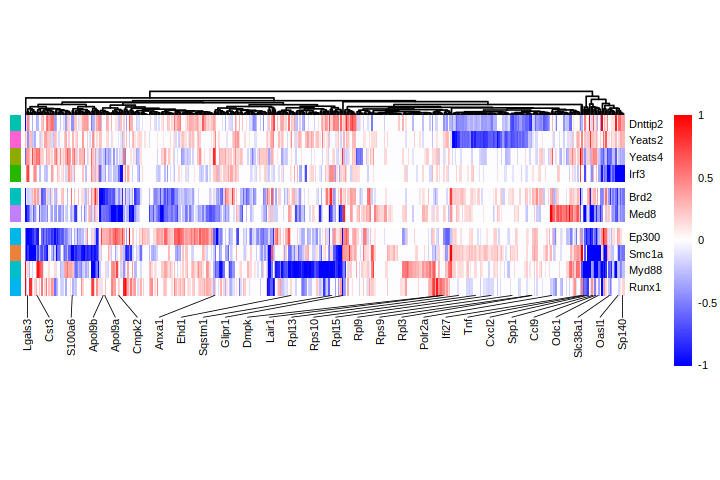

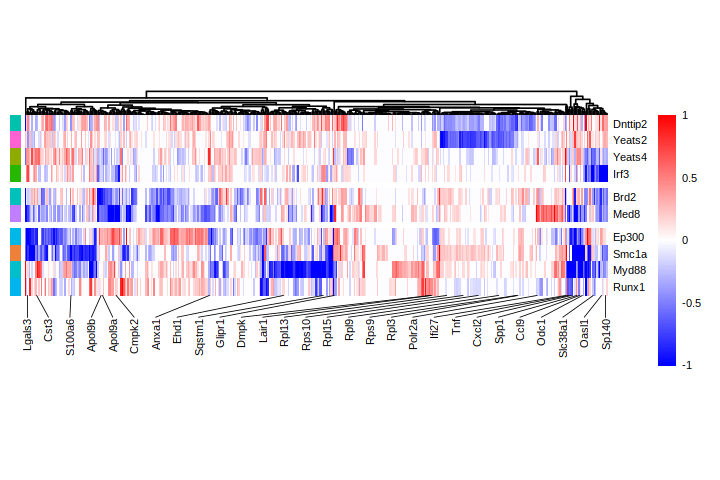

In [367]:
# turn it 90 degrees
dea_string_p <- as.ggplot(add.flag(pheatmap(t(dea_lfc_top),
#                                 display_numbers = ,
                                breaks=seq(-1, 1, length.out=200),
                                color=colorRampPalette(c("blue", "white", "red"))(200),
                                angle_col = 90,
                                show_rownames=T,
                                show_colnames=T,
                                   annotation_names_row = F,
#                                    labels_col = labels_col,
#                                 annotation_col = annot_ko,
                                   annotation_row = annot_ko,
                                annotation_colors = list(KO=KO_col[kos]),
                                            annotation_legend = FALSE,
                                            annotation_names_col = FALSE,
#                                 cutree_rows = 3, # split row clusters
#                                 cutree_cols = 4, # split col clusters
                                treeheight_row = 10,
                                treeheight_col = 10,
#                                    cluster_cols = F,
                                   cluster_rows = F,
#                                             gaps_col = c(4,8),
                                   gaps_row = c(4,6),
#                                 cellwidth = 10,
                                cellheight = 10,
                                fontsize = 6,
                                height=height,
                                widht=width,
                                silent=TRUE
                                  ),
                                   kept.labels = top_labels,
                                   repel.degree = 0
                                  )
                         )
dea_string_p

In [368]:
# save plot
ggsave_new(filename=paste0("DEA_LFC_nonTrivial_nonSTRING_KOs"),
           results_path=results_path,
           plot=dea_string_p,
           width=width,
           height=height
          )

# Clustermap of DEA AB at 6h

In [32]:
stat_sign <- 0.05
cond <- 'LO28-6h'

In [33]:
# aggregate all DEA AB results
dea_ab_results <- data.frame()

for (KO_gene in unique(KO150_mixscape$KO_call)){ #unique(KO150$KO_call)){

    if ((KO_gene=="NonTargeting")) {#  | (sum(KO150$cond_KO==paste(cond,KO_gene,sep='+'))==0)) {
        next
    }

    tmp_dea_res <- read.csv(file=file.path(data_path, 'DEA_condition_mixscape', paste0('KO150_DEA_AB_',cond,'_',KO_gene,'.csv')), row.names=1)
    if (dim(tmp_dea_res)[1]==0){
        next
    }
    tmp_dea_res$ab <- rownames(tmp_dea_res)
    rownames(tmp_dea_res) <- NULL
    tmp_dea_res$group <- paste0(cond,'_',KO_gene)

    if(dim(dea_ab_results)[1]==0){
        dea_ab_results <- tmp_dea_res
    }else{
        dea_ab_results <- rbind(dea_ab_results, tmp_dea_res)
    }
}

dim(dea_ab_results)
head(dea_ab_results)

[1] 138   7

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,ab,group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,2.867983e-23,-0.7816663,1.000,1.000,3.154782e-22,CD274,LO28-6h_Irf9
2,1.894369e-13,-0.3282526,1.000,1.000,2.083806e-12,CD64,LO28-6h_Irf9
3,2.123886e-05,0.2598581,1.000,1.000,2.336275e-04,CD14,LO28-6h_Irf9
4,1.497050e-03,-0.1613016,0.667,0.777,1.646755e-02,CD69,LO28-6h_Irf9
5,1.522909e-03,0.2868601,1.000,1.000,1.675200e-02,CD80,LO28-6h_Irf9
6,1.431969e-01,0.1121050,1.000,1.000,1.000000e+00,CD11b,LO28-6h_Irf9


In [34]:
# make adjp dataframe for visualization of significance with *
dea_ab_results_adjp <- pivot_wider(dea_ab_results,id_cols='group', names_from='ab',  values_from = "p_val_adj", values_fill = 1)
dea_ab_results_adjp <- data.frame(dea_ab_results_adjp, row.names=dea_ab_results_adjp$group)
dea_ab_results_adjp$group <- NULL
mask <- dea_ab_results_adjp <= stat_sign
dea_ab_results_adjp[mask] <- '*'
dea_ab_results_adjp[!mask] <- ' '
# dim(dea_ab_results_adjp)
# head(dea_ab_results_adjp)

In [35]:
# make LFC dataframe for visualization of effect size
dea_ab_results_lfc <- pivot_wider(dea_ab_results,id_cols='group', names_from='ab',  values_from = "avg_log2FC", values_fill = 0)
dea_ab_results_lfc <- data.frame(dea_ab_results_lfc, row.names=dea_ab_results_lfc$group)
dea_ab_results_lfc$group <- NULL
# dim(dea_ab_results_lfc)
# head(dea_ab_results_lfc)

In [36]:
width <- 4
height <- 4
options(repr.plot.width=width, repr.plot.height=height)

In [37]:
tmp_idx <- grepl(cond, rownames(dea_ab_results_lfc), fixed = TRUE)
tmp_lfc <- dea_ab_results_lfc[tmp_idx,]
tmp_adjp <- dea_ab_results_adjp[tmp_idx,]

In [38]:
rownames(tmp_lfc) <- gsub(pattern = 'LO28-6h_',replacement = '', x = rownames(tmp_lfc))

In [39]:
annot_ko <- data.frame(KO=rep("", nrow(tmp_lfc)))
rownames(annot_ko) <- rownames(tmp_lfc)
annot_ko$KO <- rownames(tmp_lfc)

dim(annot_ko)
head(annot_ko)

[1] 25  1

,KO
,<chr>
Irf9,Irf9
Smarca4,Smarca4
Ep300,Ep300
Spi1,Spi1
Arid1a,Arid1a
Dnmt1,Dnmt1


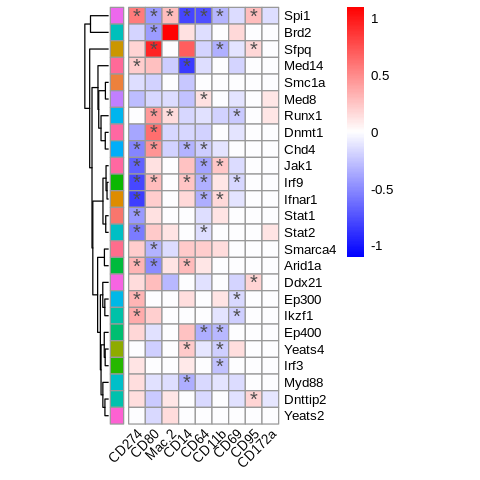

In [40]:
# plot
dea_ab_lfc_plot <- as.ggplot(pheatmap(tmp_lfc,
         display_numbers=as.matrix(tmp_adjp),
         cellwidth = 10,
         cellheight = 10,
         angle_col = "45",
         breaks=seq(-max(abs(dea_ab_results_lfc)), max(abs(dea_ab_results_lfc)), length.out=200),
         color=colorRampPalette(c("blue", "white", "red"))(200),
                                      show_rownames=TRUE,
                                show_colnames=TRUE, 
                                annotation_row = annot_ko,
                                annotation_colors = list(KO=KO_col[rownames(tmp_lfc)]),
                                            annotation_legend = FALSE,
                                            annotation_names_row = FALSE,
#                                 cutree_rows = 3, # split row clusters
#                                 cutree_cols = 4, # split col clusters
                                treeheight_row = 10,
                                treeheight_col = 0,
                                fontsize = 8,
                                      fontsize_number = 12,
                                height=height,
                                widht=width,
                            ))

In [41]:
# save plot
ggsave_new(filename=paste0("DEA_AB_LFC_",cond),
           results_path=results_path,
           plot=dea_ab_lfc_plot,
           width=width,
           height=height
          )

# Ep400 DEGs Expression Heatmap

In [15]:
# configs
cond <- "LO28-6h"
ko <- "Ep400"

# not used:
selected_genes <- c("Trem2",
                    "Ifi27",
                    "Ifi27l2a",
                    "Lilr4b", # PT wanted: Lilrb4a
                    "Malat1",
                    "Myd88",
                    "Hspd1", # PT wanted: HSP60
                    "Ifitm3")

In [16]:
# load DEA results
dea_res <- read.csv(file.path(data_path,"DEA_condition_mixscape", paste0("KO150_DEA_RNA_",cond,"_",ko,".csv")), row.names=1)
dim(dea_res)
head(dea_res)

[1] 5063    5

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Zcchc24,1.142402e-13,0.1964729,0.121,0.005,1.695895e-09
Ptma,6.276535e-12,-1.1767478,1.000,1.000,9.317516e-08
Anp32b,3.428280e-10,-1.1732865,0.939,0.983,5.089282e-06
Eif5a,3.702022e-10,-0.8081262,1.000,0.999,5.495651e-06
Ppp1r14b,3.803590e-10,-1.0710165,0.909,0.975,5.646429e-06
Mmp28,1.101080e-09,0.1521413,0.121,0.008,1.634554e-05


In [17]:
# get normalized SCT expression data and scale by features/genes
KO150_norm <- GetAssayData(object = KO150, slot = "data", assay="SCT")
KO150_norm <- scale(t(as.matrix(KO150_norm)))
dim(KO150_norm)
# head(KO150_norm)

[1] 28303 17131

In [18]:
# get DEGs and cell annotation for condition, KO and if mixscape selected
genes <- rownames(dea_res)[dea_res$p_val_adj<=0.05]
# cells <- rownames(KO150[[]])[(KO150$KO_call=="Ep400") & (KO150$condition==cond)]
cells_KO <- rownames(KO150_mixscape[[]])[(KO150_mixscape$mixscape_class=="Ep400 KO")] # already only LO28-6h cells  #& (KO150_mixscape$condition==cond)]
# cells_NT <- rownames(KO150[[]])[(KO150$KO_call=="NonTargeting") & (KO150$condition==cond)]

In [19]:
# # make annotation data frame for heatmap
# annot_cells <- data.frame(perturbed=rep('NP', length(c(cells))))
# rownames(annot_cells) <- c(cells)
# annot_cells[cells_KO,'perturbed'] <- 'KO'
# # annot_cells[cells_NT,'perturbed'] <- 'NT'

# annot_cells <- annot_cells[order(annot_cells$perturbed),,drop=FALSE]

# dim(annot_cells)
# head(annot_cells)

In [23]:
width <- 6
height <- 3
options(repr.plot.width=width, repr.plot.height=height)

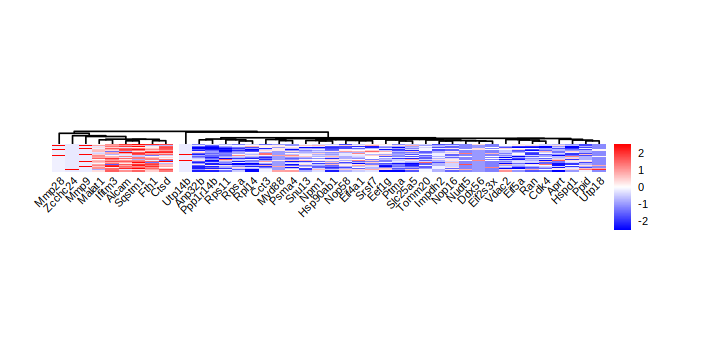

In [28]:
# plot scaled expression data
ep400_p <- as.ggplot(pheatmap(KO150_norm[cells_KO, genes],#KO150_norm[rownames(annot_cells), genes],
                   breaks=seq(-2.5, 2.5, length.out=200),
                   color=colorRampPalette(c("blue", "white", "red"))(200),
                   show_rownames=F,
                                show_colnames=T, 
                    #annotation_row = annot_cells,
                              cluster_rows=F,
                              #gaps_row = head(as.numeric(cumsum(table(annot_cells$perturbed))), -1),
#                    cutree_rows = 2, # split row clusters
                   cutree_cols = 2, # split col clusters
#                    treeheight_row = 5,
                treeheight_col = 3,
                    cellwidth = 8,
                    cellheight = 0.5,
                    fontsize = 6,
                    height=height,
                    widht=width,
                   border_color = NA,
                   angle_col = 45,
                              legend=T,
#                               annotation_legend=F,
                              annotation_names_row = F,
                    silent=TRUE
                  )
         )

ep400_p

In [29]:
# save plot
ggsave_new(filename=paste0("Ep400_HM"),
           results_path=results_path,
           plot=ep400_p,
           width=width,
           height=height
          )

# Ep300-Sfpq overlapping enrichment

In [57]:
cond <- "LO28-6h"
kos <- c("Ep300", "Sfpq")
db <- "GO_Biological_Process_2021"
top_n <- 5

In [58]:
# load and aggregate enrichment results for INTERSECTING TERMS
enrich_res <- data.frame()

for (KO_gene in kos){
    for (direction in c('up','down')){
    
        tmp_enrichments <- read.delim(file=file.path(data_path, 
                                                     "enrichment_analysis", 
                                                     "DEA_condition_mixscape",
                                                     paste0(cond,'_',KO_gene,'_',direction),
                                                     db,
                                                     paste0('Enrichr_',db,'_',cond,'_',KO_gene,'_',direction,'.csv')
                                                    ), 
                                      sep=',', header = TRUE)

        # remove unnecessary columns
        tmp_enrichments[,c('X','Gene_set','Overlap','P.value','Genes')] <- NULL

        # add annotation data
        tmp_enrichments$direction <- direction
        tmp_enrichments$condition <- cond
        tmp_enrichments$ko <- KO_gene

        if(nrow(enrich_res)==0){
            enrich_res <- tmp_enrichments
        }else{
            enrich_res <- rbind(enrich_res, tmp_enrichments)
        }
    }   
}

dim(enrich_res)
head(enrich_res)

[1] 3212    6

,Term,Adjusted.P.value,Odds.Ratio,direction,condition,ko
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,3'-UTR-mediated mRNA stabilization (GO:0070935),0.08405328,23.770833,up,LO28-6h,Ep300
2,B cell activation (GO:0042113),0.22187422,4.902851,up,LO28-6h,Ep300
3,B cell proliferation (GO:0042100),0.10343717,16.773756,up,LO28-6h,Ep300
4,BMP signaling pathway (GO:0030509),0.16940919,7.300789,up,LO28-6h,Ep300
5,CD40 signaling pathway (GO:0023035),0.06943448,35.665865,up,LO28-6h,Ep300
6,DNA catabolic process (GO:0006308),0.08091421,25.933566,up,LO28-6h,Ep300


In [59]:
# determine top_n by significance for each group
top_terms <- list()

# only keep top_n terms by significance
for (KO_gene in kos){
    for (direction in c('up','down')){
        
        tmp_enrichments <- enrich_res[(enrich_res$direction==direction) & (enrich_res$ko==KO_gene),]
        tmp_terms <- tmp_enrichments$Term[order(tmp_enrichments$Adjusted.P.value)[1:top_n]]
        top_terms <- unique(c(top_terms, tmp_terms))
    }
}


length(top_terms)
top_terms

[1] 18

[[1]]
[1] "defense response to virus (GO:0051607)"

[[2]]
[1] "defense response to symbiont (GO:0140546)"

[[3]]
[1] "cellular response to type I interferon (GO:0071357)"

[[4]]
[1] "type I interferon signaling pathway (GO:0060337)"

[[5]]
[1] "cytokine-mediated signaling pathway (GO:0019221)"

[[6]]
[1] "neutrophil activation involved in immune response (GO:0002283)"

[[7]]
[1] "neutrophil degranulation (GO:0043312)"

[[8]]
[1] "neutrophil mediated immunity (GO:0002446)"

[[9]]
[1] "regulation of T cell activation (GO:0050863)"

[[10]]
[1] "negative regulation of lymphocyte activation (GO:0051250)"

[[11]]
[1] "response to interferon-gamma (GO:0034341)"

[[12]]
[1] "cellular response to interferon-gamma (GO:0071346)"

[[13]]
[1] "cellular response to cytokine stimulus (GO:0071345)"

[[14]]
[1] "regulation of mRNA splicing, via spliceosome (GO:0048024)"

[[15]]
[1] "negative regulation of mRNA processing (GO:0050686)"

[[16]]
[1] "negative regulation of mRNA splicing, via spliceosome (GO:0048025)"

[[17]]
[1] "positive regulation of cell morphogenesis involved in differentiation (GO:0010770)"

[[18]]
[1] "positive regulation of translation (GO:0045727)"

In [60]:
# filter for top terms
enrich_res <- enrich_res[enrich_res$Term %in% top_terms,]
dim(enrich_res)
head(enrich_res)

[1] 50  6

,Term,Adjusted.P.value,Odds.Ratio,direction,condition,ko
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
90,cellular response to cytokine stimulus (GO:0071345),1.068598e-03,7.607211,up,LO28-6h,Ep300
95,cellular response to interferon-gamma (GO:0071346),1.609677e-05,26.563980,up,LO28-6h,Ep300
117,cellular response to type I interferon (GO:0071357),4.090150e-08,48.956994,up,LO28-6h,Ep300
129,cytokine-mediated signaling pathway (GO:0019221),5.918680e-08,11.353057,up,LO28-6h,Ep300
135,defense response to symbiont (GO:0140546),9.503312e-11,41.361726,up,LO28-6h,Ep300
136,defense response to virus (GO:0051607),1.055552e-11,42.463108,up,LO28-6h,Ep300


In [61]:
# prepare data for plotting

# order entries by adjusted p-value
enrich_res <- enrich_res[order(enrich_res$Adjusted.P.value),]

# remove stat. weaker duplicates within same comparison (ie KO)
enrich_res <- enrich_res[!duplicated(enrich_res[,c('Term','ko')]),]

# calculate & cap -log10(pvalue)
enrich_res$Adjusted.P.value <- -log10(enrich_res$Adjusted.P.value)
enrich_res$Adjusted.P.value[enrich_res$Adjusted.P.value>4] <- 4

# change sign of downregulated p-values
enrich_res <- as.data.table(enrich_res)

enrich_res[, Adjusted.P.value:=ifelse(direction=='up', Adjusted.P.value, -Adjusted.P.value)]

# remove GO BP numbers
enrich_res$Term <- remove_term_suffix(db=db, terms=enrich_res$Term)

In [62]:
width <- 5.5
height <- 4
options(repr.plot.width=width, repr.plot.height=height)

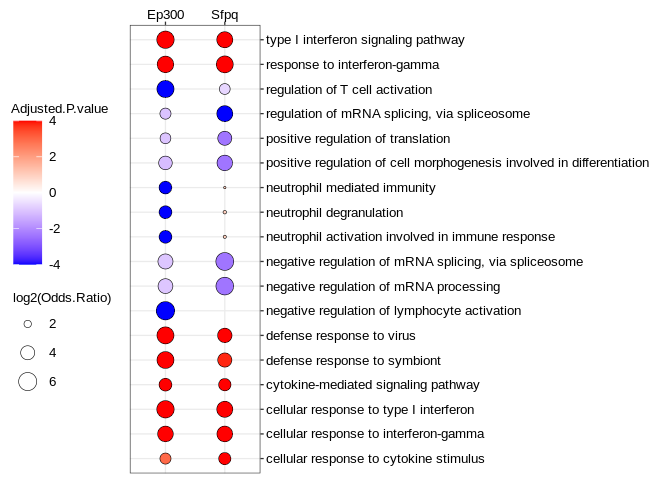

In [63]:
enr_p <- ggplot(enrich_res, aes(x=ko, y=Term, fill=Adjusted.P.value, size=log2(Odds.Ratio)))+ 
geom_point(shape=21, stroke=0.25) +
scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0)+
scale_y_discrete(position = "right") + 
scale_x_discrete(position="top") +
scale_size_continuous(
            range = c(0.5,5), 
        breaks = c(2, 4, 6),
#         limits = c(0, 6) # removes data outside of the limit!
    ) + 
macro_theme() + 
theme(axis.text.x = element_text(angle = 0, hjust = 0.5, vjust=0),
      axis.text.y = element_text(angle = 0, hjust = 1, vjust=0.5),
      axis.title.x=element_blank(),
      axis.title.y=element_blank(),
     legend.position="left",)
     

enr_p

In [64]:
# save plot
ggsave_new(filename="Ep300_Sfpq_enrichments",
           results_path=results_path,
           plot=enr_p,
           width=width,
           height=height
          )

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warnin

ERROR: Error in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, : invalid font type
